# Detecção de bordas e contornos

Em 2019 houve uma série de manchas de petróleo nas praias nordestinas, causando um grande impacto nas comunidades e toda uma preocupação de como evitar que casos como esse possam prejudicar comunidades e todo o ecossistema envolvido.

Naquele mesmo ano a NASA organizou um hackathon para desafiar soluções para problemas como este, da qual um grupo do Brasil foi vencedor. [Neste](https://hipsters.tech/hackathons-nasa-e-manchas-de-oleo-hipsters-ponto-tech-178/) episódio do podcast Hipsters.tech tem mais detalhes.

Utilizando ferramentas de visão computacional iremos identificar uma mancha de petróleo de uma imagem de satélite e estimar o seu tamanho como forma de alertar as autoridades para ações mais rápidas, supondo todo um sistema integrado.

Para realizar esta análise, serão utilizando os seguintes conceitos de visão computacional:

1. Espaço de cores
2. Suavização
3. Limiarização
4. Identificação de bordas
5. Identificação de contornos

Circulou na [imprensa](https://g1.globo.com/natureza/desastre-ambiental-petroleo-praias/noticia/2019/10/17/as-possiveis-razoes-da-volta-do-oleo-as-praias-do-nordeste-que-ja-haviam-se-livrado-dele.ghtml) de 2019 imagens como a abaixo, obtidas por satélites para exibir a extensão das manchas e seus potenciais danos na vida marinha.

![](https://github.com/michelpf/fiap-on-visao-computacional/blob/master/imagens/petroleo-pernambuco.jpeg?raw=true)

## Bibliotecas necessárias

Vamos trabalhar com o OpenCV e algumas outras bibliotecas de suporte, como o Numpy para matrizes e o Matplotlib para exibição das imagens.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

Vamos baixar a imagem deste projeto.

In [ ]:
!git clone https://github.com/michelpf/fiap-on-visao-computacional
%cd fiap-on-visao-computacional/aula-bordas-contornos

## Pré-processando a imagem

Lendo a imagem originalmente e trabalhando com o espaço de cores para melhor identificar os contornos e bordas.

In [3]:
imagem = cv2.imread("imagens/petroleo-pernambuco.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

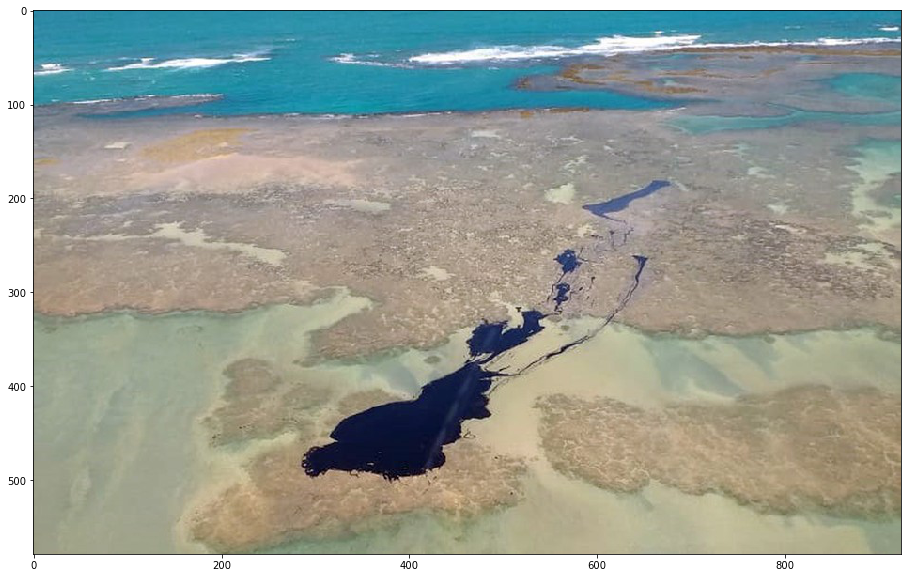

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(imagem)

Para identificarmos os contornos da mancha, precisamos converter a imagem em escala de cinza.

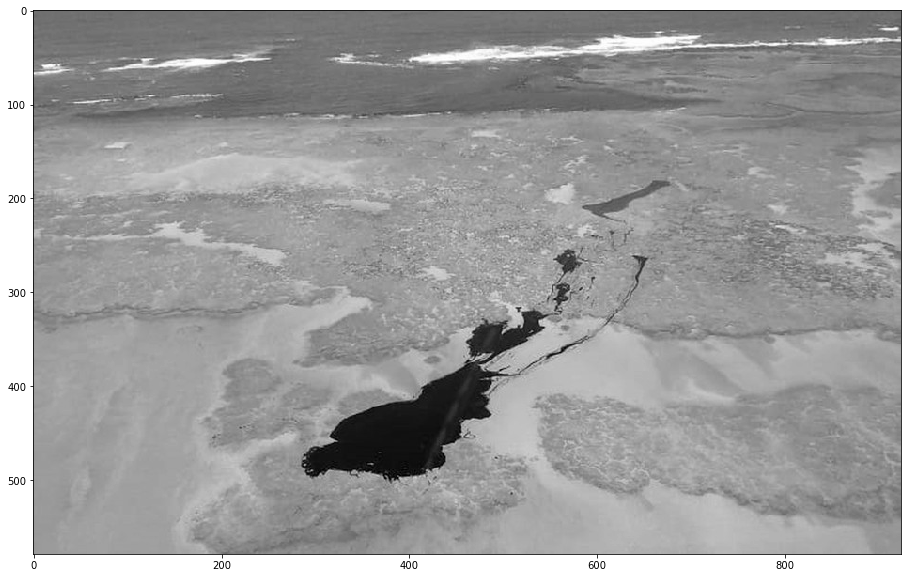

In [5]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 10))
plt.imshow(imagem_gray, cmap="gray")

Uma técnica que ajuda a remover ruídos da imagem e destacar melhor as bordas é a suavização seguida de limizarização.
Vamos começar limiarizando a imagem.

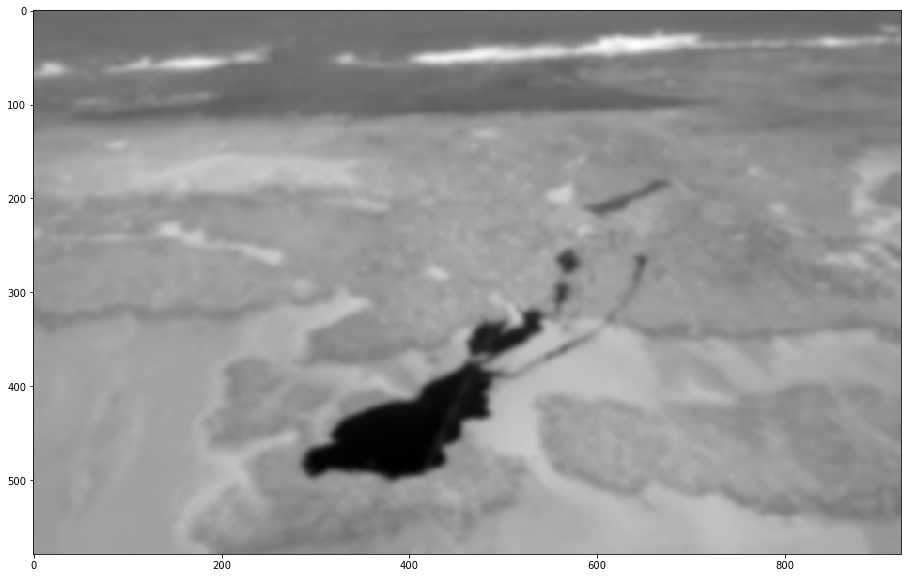

In [6]:
imagem_gray_suav = cv2.GaussianBlur(imagem_gray, (19,19), 0)

plt.figure(figsize=(20, 10))
plt.imshow(imagem_gray_suav, cmap="gray")

Agora, vamos limirizar a imagem na intensidade de pixel de 95, ou seja, tudo que for menor que esse limiar será removido da imagem.

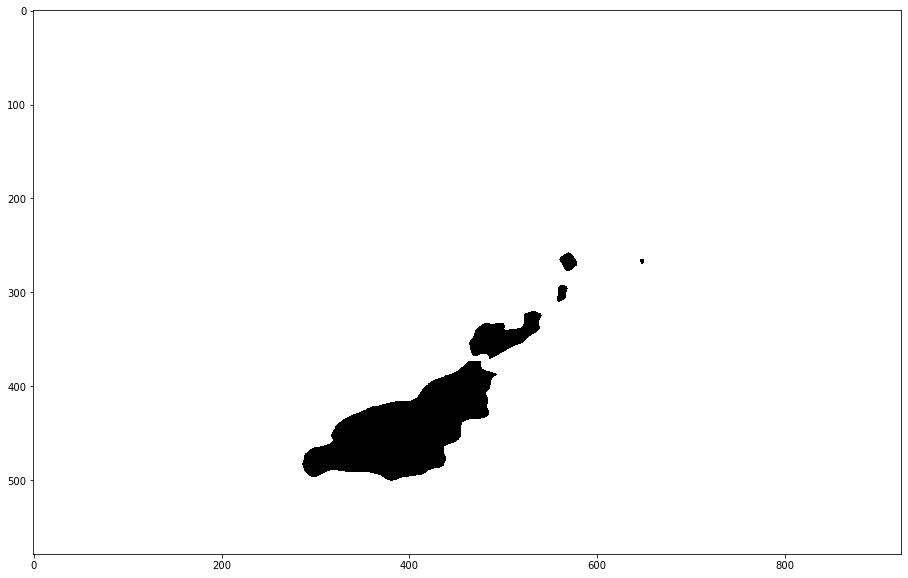

In [16]:
ret, imagem_gray_lim = cv2.threshold(imagem_gray_suav, 95, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 10))
plt.imshow(imagem_gray_lim, cmap="gray")

## Identificando bordas

Nosso próximo passo é encontrar as bordas na imagem limiarizada, a qual está mais clara e pronto para o algoritmo maximizar as detecções.

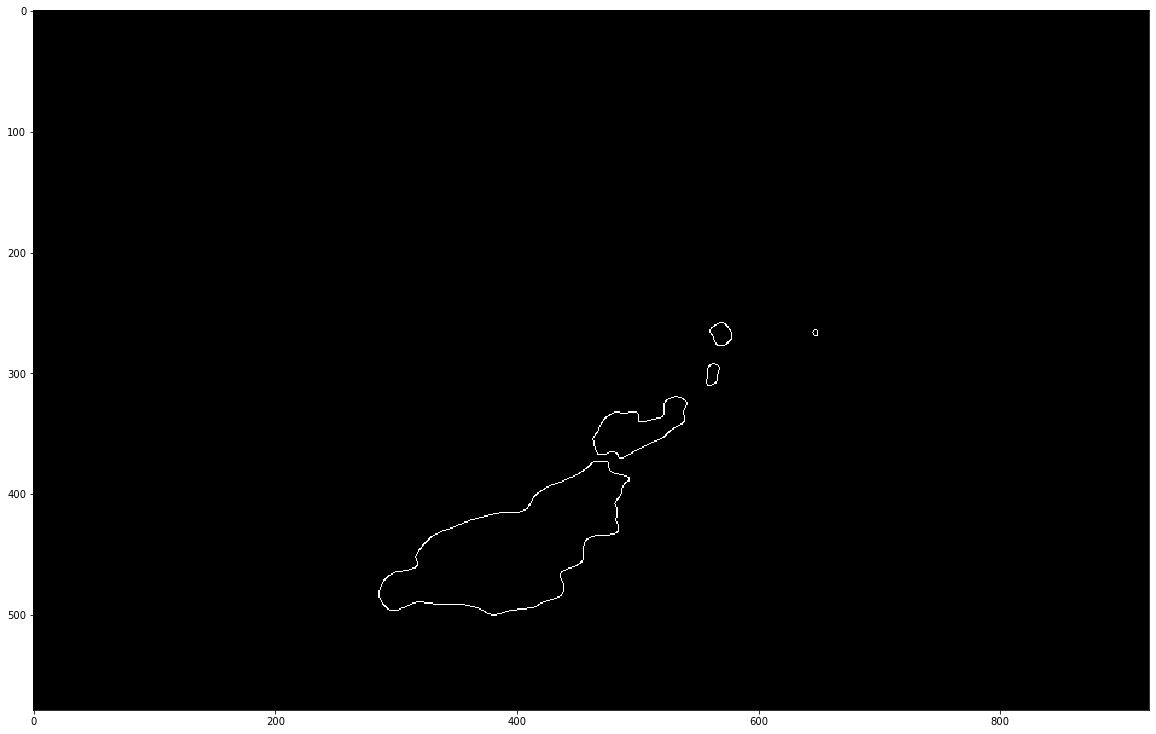

In [8]:
imagem_bordas = cv2.Canny(imagem_gray_lim, 1, 100)

plt.figure(figsize=(20, 20))
plt.imshow(imagem_bordas, cmap="gray")

## Obtendo os contornos

Com as bordas definidas, agora vamos encontrar os contornos a partir delas e também verificar o valor das áreas. Note que como as imagens originais são dadas em pixel o cálculo das áreas são em pixel quadrado. Uma vez que tenhamos a escala da imagem é possível estimar o valor correto da área da mancha.

In [9]:
_, contornos, _ = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

len(contornos)

5

Encontramos 5 manchas, com o intuito de priorizar podemos verificar o valor das áreas e separar aquelas com maior área para envio de alertas, por exemplo.

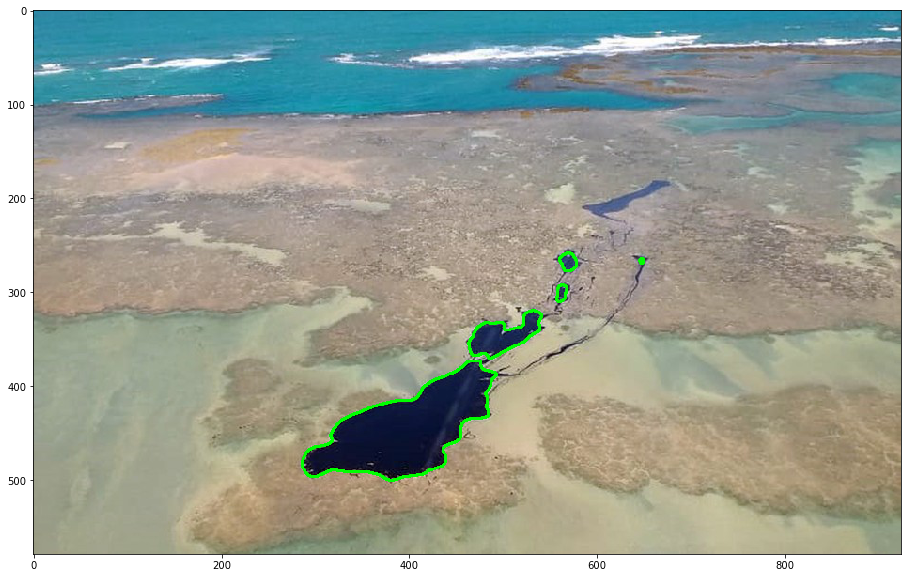

In [10]:
imagem_contorno = imagem.copy()

cv2.drawContours(imagem_contorno, contornos, -1, (0,255,0), 2)

plt.figure(figsize=(20, 10))
plt.imshow(imagem_contorno)

## Cálculo da área das manchas

Com os contornos somos capazes de calcular a área da mancha e assim excluir áreas muito pequenas que talvez poderiam ser desprezíveis ou ainda priorizar as maiores.

In [11]:
for idx, contorno in enumerate(contornos):
    area = cv2.contourArea(contorno)
    print("Contorno " + str(idx+1) + ", Área: " + str(area) + " px^2")

Contorno 1, Área: 12967.0 px^2
Contorno 2, Área: 1974.0 px^2
Contorno 3, Área: 141.5 px^2
Contorno 4, Área: 14.5 px^2
Contorno 5, Área: 251.0 px^2


Supondo que a imagem em satélite representa uma ampliação da qual 1 pixel equivale a 2 metros, poderíamos calcular a área no sistema métrico. Antes, vamos fazer uma análise dimensional para determinarmos o fator de multiplicação.

Dado a área em pixels quadrados, Apx = px * px = px^2, sendo 1 px = 2 m, Am = 2m * 2m = 4m^2. Com isso, o valor calculado em pixels quadrados pode ser multiplicado por 4 para ser convertido em metros quadrados. 

In [13]:
for idx, contorno in enumerate(contornos):
    area = cv2.contourArea(contorno) * 4
    print("Contorno " + str(idx+1) + ", Área: " + str(area) + " m^2")

Contorno 1, Área: 51868.0 m^2
Contorno 2, Área: 7896.0 m^2
Contorno 3, Área: 566.0 m^2
Contorno 4, Área: 58.0 m^2
Contorno 5, Área: 1004.0 m^2
